In [72]:
using Pkg; Pkg.activate("."); 
using Revise
import MUST
using PyPlot

MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2" ;
#MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" ;

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/dispatch2multi/Project.toml`


In [73]:
# model_box = MUST.Boxes(MUST.@in_dispatch("data/TSO_binsbyhand_6bins_lines1"));
# model_box = MUST.Boxes(MUST.@in_dispatch("data/sun_TSO_select"));
model_box = MUST.Boxes(MUST.@in_dispatch("data/sun_TAB_fromStagger_hD"));

In [74]:
m = model_box[end];

In [75]:
# eos = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/TSO_table_lines1_6bins"));
eos = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/solar_lte"));
# eos = MUST.SquareGasEOS(MUST.@in_dispatch("input_data/solar_lte"));

In [85]:
MUST.multiBox(m, eos, "sun_TAB_fromStagger_hD", downsample_xy=20)

In [86]:
b_d = MUST.multiBox("sun_TAB_fromStagger_hD");
@show size(b_d);

size(b_d) = (10, 10, 96)


In [78]:
b_m = MUST.multiBox("/u/peitner/MULTI3D/Multi3D/input_multi3d/atmos/t5777g44m0005_20.5x5x230");

In [79]:
exp10(-6.3)

5.011872336272725e-7

tini = 12100.0
rhos = 5.370317963702533e-7
argmin(abs.(t .- tini)) = 71
length(t) = 96
(MUST.axis(b_d, :z))[argmin(abs.(t .- tini))] = -9.192244f6


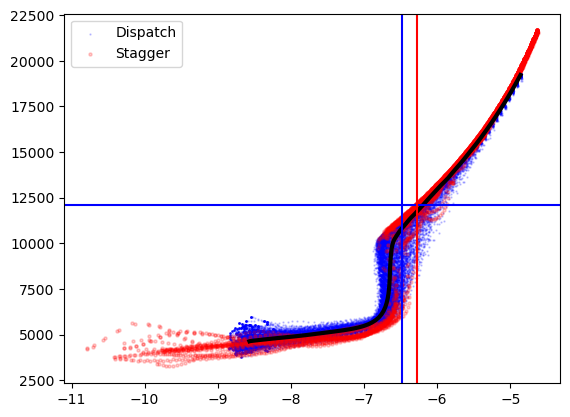

PyObject <matplotlib.legend.Legend object at 0x2ae947fcb190>

In [80]:
tini   = 12100.0
rhoini = 3.3e-7
rhos   = exp10(-6.27)

@show tini rhos

t = MUST.plane_statistic(MUST.mean, b_d, :T)
d = MUST.plane_statistic(MUST.mean, b_d, :d)
@show argmin(abs.(t.-tini)) length(t) MUST.axis(b_d, :z)[argmin(abs.(t.-tini))]

plt.scatter(log10.(b_d[:d]), b_d[:T], s=0.5, alpha=0.2, label="Dispatch", color="blue")
plt.scatter(log10.(b_m[:d]), b_m[:T], s=5.0, alpha=0.2, label="Stagger", color="red")

plt.plot(log10.(d), t, color="k", lw=3)

plt.axvline(log(10, rhoini), color="blue")
plt.axhline(tini, color="blue")

plt.axvline(log10(rhos), color="red")

#plt.xlim(log(10, 1.e-7), log(10, 1e-6))
#plt.ylim(8000,14000)
plt.legend()

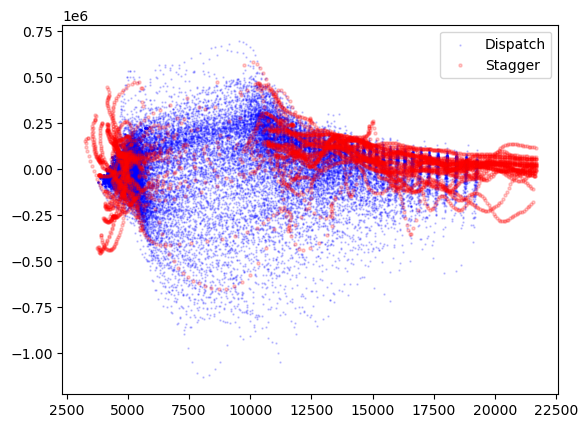

In [81]:
plt.scatter(b_d[:T], b_d[:uz], s=0.5, alpha=0.2, color="blue", label="Dispatch")
plt.scatter(b_m[:T], b_m[:uz], s=5.0, alpha=0.2, color="red", label="Stagger")

plt.legend();

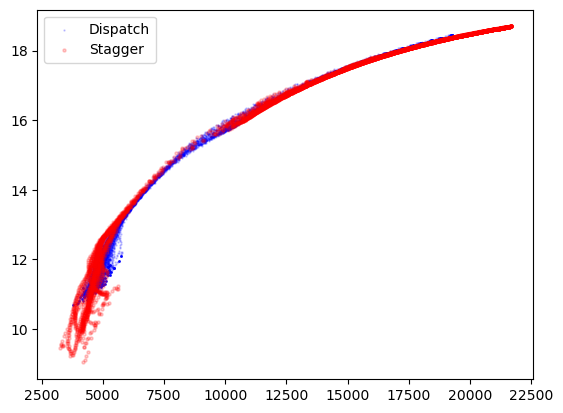

In [88]:
plt.scatter(b_d[:T], log10.(b_d[:Ne]), s=0.5, alpha=0.2, color="blue", label="Dispatch")
plt.scatter(b_m[:T], log10.(b_m[:Ne]), s=5.0, alpha=0.2, color="red", label="Stagger")

plt.legend();

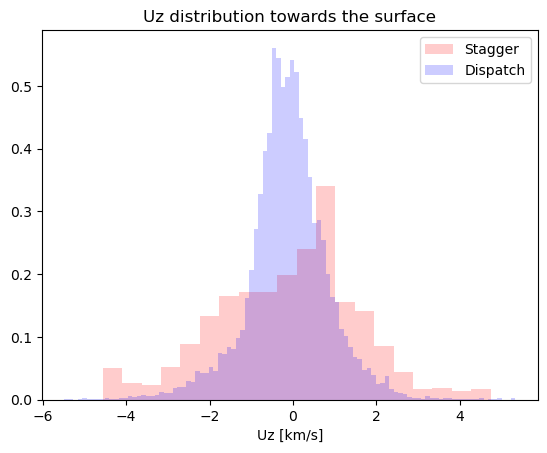

In [82]:
mask_m = b_m[:T] .< 6000.0
mask_d = b_d[:T] .< 6000.0

u_m  = b_m[:uz][mask_m] ./ 1e5
u_d  = b_d[:uz][mask_d] ./ 1e5

plt.hist(reshape(u_m, :), bins=20, alpha=0.2, color="red", density=true, label="Stagger")
plt.hist(reshape(u_d, :), bins=100, alpha=0.2, color="blue", density=true, label="Dispatch")

plt.title("Uz distribution towards the surface")
plt.xlabel("Uz [km/s]")

plt.legend();

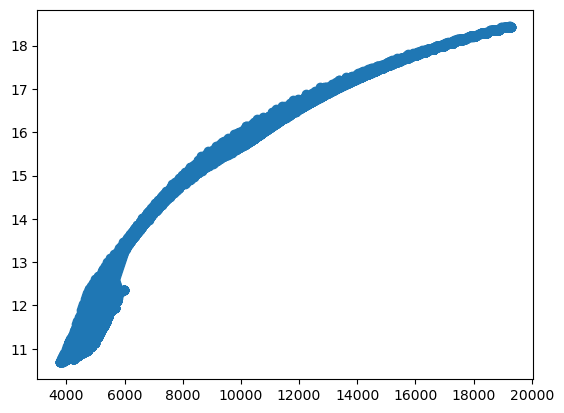

PyObject <matplotlib.collections.PathCollection object at 0x2ae976e8c3a0>

In [83]:
plt.scatter(b_d[:T], log.(10, b_d[:Ne]))